# Practical 15

## Aim : Apply SVM using different kernels to classify the SocialNetwork dataset and compare results with KNN and Logistic Regression algos

### SVM

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, datasets

In [2]:
# import the dataset
df = pd.read_csv(r"D:\Sem 4\AML\Datasets\SocialNetworkAds.csv")
print(df)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


In [3]:
df.isnull()

,Age,EstimatedSalary,Purchased
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
395,False,False,False
396,False,False,False
397,False,False,False
398,False,False,False


In [4]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
x = df.iloc[:200,:-1].values
y = df.iloc[:200,-1].values

In [6]:
x[0:10],y[0:10]

(array([[    19,  19000],
        [    35,  20000],
        [    26,  43000],
        [    27,  57000],
        [    19,  76000],
        [    27,  58000],
        [    27,  84000],
        [    32, 150000],
        [    25,  33000],
        [    35,  65000]], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64))

In [7]:
# We create an onstance of SVM and fit out data
# We do not scale our data since we want to plot the support vector

# The SVC class constructor takes following parameters:
# 1. kernels : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default = 'rbf'
# 2. C: float, defaut = 1.0
# 3. degree: int, default = 3
# 4. gamma: kernet coeffecient for 'rbf', 'poly' and 'sigmoid'

C = 1.0  #SVM regularization parameter
svc1 = svm.SVC(kernel = 'linear', C=1, gamma = 0.1, random_state = 1).fit(x,y)
svc2 = svm.SVC(kernel = 'rbf', gamma = 0.5, C = 1).fit(x,y)
svc3 = svm.SVC(kernel = 'poly', degree = 5, C = 1).fit(x,y)

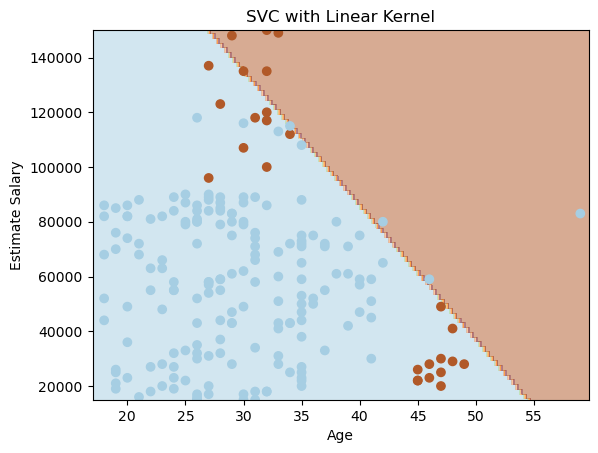

In [8]:
# Use SVM linear kernel
# Create a mesh to plot in matplotlib

# Extracting min and max value from all rows of sepal length only
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1

# Extracting min and max value from all rows of sepal width only
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

# calculate step-index value for numpy.arrange()
h = (x_max / x_min)/10

# numpy.meshgrid(): builds 2-D grids from 1-D array
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# numpy.c_ : concatenates arrays column by column
# numpy.r_ : concatenates arrays row by row
# numpy.ravel() function returns contiguous flattened array

z = svc1.predict(np.c_[xx.ravel(), yy.ravel()])
# converting z into 2-D matrix
z = z.reshape(xx.shape)

# plt.contourf() creates a filled contour plot with following arguments:
# 1. cmap argument: Specifies range of colormaps avaliable
# 2. alpha: Specifies color transparency in range 0 to 1

plt.contourf(xx, yy, z, cmap = plt.cm.Paired, alpha = 0.5)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap = plt.cm.Paired)
plt.xlabel('Age')
plt.ylabel('Estimate Salary')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVC with Linear Kernel')
plt.show()

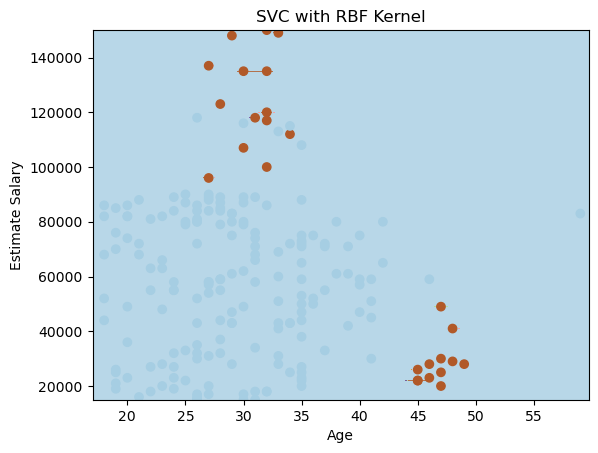

In [9]:
# Use SVM RBF kernel
# Create a mesh to plot in matplotlib

# Extracting min and max value from all rows of sepal length only
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1

# Extracting min and max value from all rows of sepal width only
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

# calculate step-index value for numpy.arrange()
h = (x_max / x_min)/10

# numpy.meshgrid(): builds 2-D grids from 1-D array
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# numpy.c_ : concatenates arrays column by column
# numpy.r_ : concatenates arrays row by row
# numpy.ravel() function returns contiguous flattened array

z = svc2.predict(np.c_[xx.ravel(), yy.ravel()])
# converting z into 2-D matrix
z = z.reshape(xx.shape)

# plt.contourf() creates a filled contour plot with following arguments:
# 1. cmap argument: Specifies range of colormaps avaliable
# 2. alpha: Specifies color transparency in range 0 to 1

plt.contourf(xx, yy, z, cmap = plt.cm.Paired, alpha = 0.8)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap = plt.cm.Paired)
plt.xlabel('Age')
plt.ylabel('Estimate Salary')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVC with RBF Kernel')
plt.show()

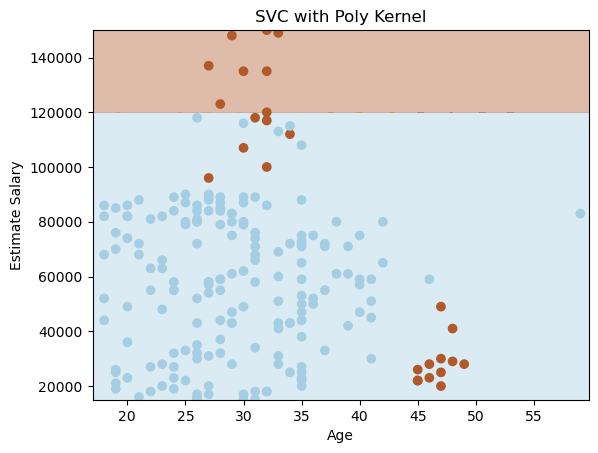

In [10]:
# Use SVM poly kernel
# Create a mesh to plot in matplotlib

# Extracting min and max value from all rows of sepal length only
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1

# Extracting min and max value from all rows of sepal width only
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

# calculate step-index value for numpy.arrange()
h = (x_max / x_min)/10

# numpy.meshgrid(): builds 2-D grids from 1-D array
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# numpy.c_ : concatenates arrays column by column
# numpy.r_ : concatenates arrays row by row
# numpy.ravel() function returns contiguous flattened array

z = svc3.predict(np.c_[xx.ravel(), yy.ravel()])
# converting z into 2-D matrix
z = z.reshape(xx.shape)

# plt.contourf() creates a filled contour plot with following arguments:
# 1. cmap argument: Specifies range of colormaps avaliable
# 2. alpha: Specifies color transparency in range 0 to 1

plt.contourf(xx, yy, z, cmap = plt.cm.Paired, alpha = 0.4)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap = plt.cm.Paired)
plt.xlabel('Age')
plt.ylabel('Estimate Salary')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVC with Poly Kernel')
plt.show()

In [11]:
# Summary of the parameter
# 1. The kernel parameter can be tuned to take 'linear', 'poly', 'rbf', etc.
# 2. The gamma value can be tuned by setting the "Gamma" Parameter.
# 3. The C value in Python is tuned by the "Cost" parameter in R.

In [12]:
#..............................Training SVM Model..............................

In [13]:
#..............................Using Linear Kernel..............................

In [14]:
# Spliting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [15]:
svc1.fit(x_train, y_train)

SVC(C=1, gamma=0.1, kernel='linear', random_state=1)

In [16]:
# Predicting the test reult
y_pred = svc1.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0], dtype=int64)

In [17]:
# Creating the Confusion matrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[40,  2],
       [ 6,  2]], dtype=int64)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        42
           1       0.50      0.25      0.33         8

    accuracy                           0.84        50
   macro avg       0.68      0.60      0.62        50
weighted avg       0.81      0.84      0.82        50



In [19]:
#..............................Using RBF Kernel..............................

In [20]:
svc2.fit(x_train, y_train)

SVC(C=1, gamma=0.5)

In [21]:
# Predicting the test reult
y_pred2 = svc2.predict(x_test)
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
# Creating the Confusion matrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
cm

array([[41,  1],
       [ 8,  0]], dtype=int64)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90        42
           1       0.00      0.00      0.00         8

    accuracy                           0.82        50
   macro avg       0.42      0.49      0.45        50
weighted avg       0.70      0.82      0.76        50



In [24]:
#..............................Using Poly Kernel..............................

In [25]:
svc3.fit(x_train, y_train)

SVC(C=1, degree=5, kernel='poly')

In [26]:
# Predicting the test reult
y_pred3 = svc3.predict(x_test)
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
# Creating the Confusion matrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred3)
cm

array([[38,  4],
       [ 4,  4]], dtype=int64)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.50      0.50      0.50         8

    accuracy                           0.84        50
   macro avg       0.70      0.70      0.70        50
weighted avg       0.84      0.84      0.84        50



### KNN

In [29]:
import numpy as np  #importing the libraries
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [30]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [31]:
x = df.iloc[:200,:-1].values
y = df.iloc[:200,-1].values

In [32]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))  #scaling, fitting and transforming
# in this step we are using anonymous objects. linking objects without makig them refer is called anonymous objects
x[0:10]

array([[-1.52370992, -1.34479807],
       [ 0.62804284, -1.31234638],
       [-0.58231809, -0.56595749],
       [-0.44783354, -0.11163382],
       [-1.52370992,  0.50494831],
       [-0.44783354, -0.07918213],
       [-0.44783354,  0.76456184],
       [ 0.22458919,  2.90637344],
       [-0.71680264, -0.8904744 ],
       [ 0.62804284,  0.14797971]])

In [33]:
from sklearn.model_selection import train_test_split  # Splitting the data into training and test set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [34]:
from sklearn.neighbors import KNeighborsClassifier  # importing the KNN Classifier
from sklearn import metrics
k = 4
knnClassifier = KNeighborsClassifier(n_neighbors = k, metric = "minkowski", p = 2).fit(xtrain, ytrain)

In [35]:
predy = knnClassifier.predict(xtest)
print("Accuracy of model at K = 4 is :", metrics.accuracy_score(ytest, predy))

Accuracy of model at K = 4 is : 0.92


C:\Users\ANIKET KUMAR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [36]:
k = 5  #checking the accuracy of model at K = 5
knnClassifier = KNeighborsClassifier(n_neighbors = k, metric = "minkowski", p = 2).fit(xtrain, ytrain)
predy = knnClassifier.predict(xtest)
print("Accuracy of model at K = 5 is :", metrics.accuracy_score(ytest, predy))

Accuracy of model at K = 5 is : 0.92


C:\Users\ANIKET KUMAR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression # Applying regression to training data.
classifier = LogisticRegression(random_state = 2)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=2)

In [38]:
y_pred = classifier.predict(xtest)

In [39]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
print("Confusion Matrix : \n" , cm)

Confusion Matrix : 
 [[39  0]
 [11  0]]


In [40]:
import sklearn.metrics as metrics  # Finding accuracy precision and recall.
print ('Accuracy: ', metrics.accuracy_score(ytest,y_pred))
print ('Precision: ', metrics.precision_score(ytest,y_pred))
print ('Recall: ', metrics.recall_score(ytest,y_pred))

Accuracy:  0.78
Precision:  0.0
Recall:  0.0


C:\Users\ANIKET KUMAR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

C:\Users\ANIKET KUMAR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88        39
           1       0.00      0.00      0.00        11

    accuracy                           0.78        50
   macro avg       0.39      0.50      0.44        50
weighted avg       0.61      0.78      0.68        50



C:\Users\ANIKET KUMAR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANIKET KUMAR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Report

In [43]:
print("Accuracy of SVC with Linear Kernel is :", metrics.accuracy_score(y_test, y_pred))
print("Accuracy of SVC with RBF Kernel is :", metrics.accuracy_score(y_test, y_pred2))
print("Accuracy of SVC with Poly Kernel is :", metrics.accuracy_score(y_test, y_pred3))
print("Accuracy of KNN model at K = 5 is :", metrics.accuracy_score(ytest, predy))
print('Accuracy of Linear Regression: ', metrics.accuracy_score(ytest,y_pred))

Accuracy of SVC with Linear Kernel is : 0.84
Accuracy of SVC with RBF Kernel is : 0.82
Accuracy of SVC with Poly Kernel is : 0.84
Accuracy of KNN model at K = 5 is : 0.92
Accuracy of Linear Regression:  0.78
